#Configuring the GPU

In [ ]:
!nvidia-smi

Sat Jan  2 19:36:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # here we are trying to get a 2d numpy array so we can make suitable for training we are taking the open price only

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1)) # Here we are applying MinMaxFeature Scaling because we are dealing with a sigmoid function in the output, so whenever
# you deal with sigmoid function use MinMaxScaler because the MinMaxScaler are closer to sigmoid both of them output values between 0 and 1

training_set_scaled = sc.fit_transform(training_set) #Applying the Scaler on the training set to be trained

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []

for i in range(60, len(training_set)): # Here the loop starts at the index 60 because we want to cover the first 60th data from each iteration then predicting the next one
  X_train.append(training_set_scaled[i-60:i, 0]) # Here we are storing all the prices from index i until index i+60 in a 2d array so we cover the previous 60 days to predcit
  # The next day's open price
  y_train.append(training_set_scaled[i, 0]) # Here we are appending the next day's open price that results from the 60 previous days

X_train, y_train = np.array(X_train),np.array(y_train) # Trasforming the lists to numpy arrays

In [5]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [6]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # Here we are reshaping the numpy arrays so we can input them to the LSTM model because the model requires 
# The input shape to be 3d also the last parameter indicates the number of indicators and the middle one is the number of time steps

In [8]:
print(X_train.shape)

(1198, 60, 1)


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from  keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # Adding the first input layer taht has an input shape as a 2d array
# containing the number of indicators and the number of timesteps, because each indicator is shown among the same timesteps
regressor.add(Dropout(rate = 0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Here we can change the optimizer to 'RMSprop' but adam is more safer

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 11s 16ms/step - loss: 0.1031
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # Here we are concatenating the dataset for train and test back to back so we
# can get the inputs that we are going to feed our LSTM model with, the reason is why we are concatenating the frames is because there is the window affect
# and we cannot predict the second day of the next month without knowing the previous day's price therefore we need to concatenate then predict the values
# using the sliding window affect 

inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values # Here we are getting the inputs that are going to be transformed to the X_test 
# array, we are getting the inputs by getting all 60 days before the dataset_test until the end of the list, so we can have all possible inputs that can then
# be fed to the LSTM, the reason of why we are getting the 60 days before the first day of the ext month is because we cannot predict the price of the first
# day of the month without it, and the same thing goes for the next day we need the previous 60 days including the first day and so on.

inputs = inputs.reshape(-1, 1) # Here we are transforming the inputs array to into 2d array so we can apply feature scaling on it

inputs = sc.transform(inputs) # It is essential to apply the feature scaling that we had before on the inputs array so we don't make any connection
#between the training sets and the test sets

X_test = [] # A list to store the test values

number_of_forcasted_days = 20 # The number of days the test list will contain

for i in range(60, 60+number_of_forcasted_days): # Here the loop starts at the index 60 because we want to cover the first 60th data from each iteration then 
# predicting the next one and the loop ends when the days are 80 according to inputs list

  X_test.append(inputs[i-60:i, 0]) # Here we are storing all the prices from index i until index i+60 in a 2d array so we cover the previous 60 days to predcit
  # The next day's open price

X_test = np.array(X_test) # Transforming the list to numpy array

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # Transforming the shape so we can use it in the LSTM model to predict

predicted_stock_price = regressor.predict(X_test) 

predicted_stock_price = sc.inverse_transform(predicted_stock_price) # Here the prices predicted are feature scaled from 0 to 1 due to scalling the y_train when 
# training the model so we have to inverse the tramsform to predict the values

### Visualising the results

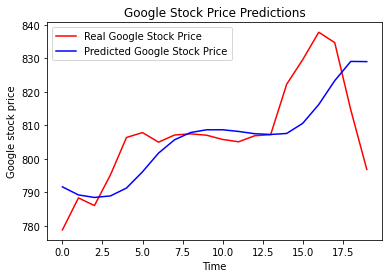

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Predictions")
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()